#**https://destinationdatascience.com/**
###**https://www.youtube.com/@destinationdatascience**

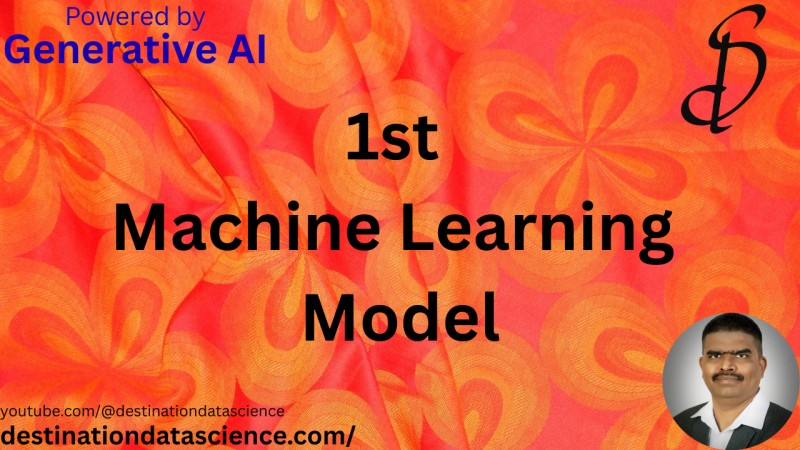

The term "delaney_solubility_with_descriptors" refers to a CSV dataset commonly used in cheminformatics and machine learning projects for predicting the aqueous solubility of chemical compounds using molecular descriptors. This dataset is referenced in many educational and demonstration projects, especially those implementing regression models (e.g., Linear Regression, Random Forest) to predict the "logS" (log solubility) value.

#**Where you’ll find it and how it’s used**

### Dataset Source: The dataset is often loaded directly from:

https://raw.githubusercontent.com/gitanuurage/YouTube/refs/heads/main/delaney_solubility_with_descriptors.csv


### Typical Usage: It is used as an example input file in data science projects, especially for model training, EDA (Exploratory Data Analysis), and model comparison tasks.

#**Example Projects and Usages**

### 1. Streamlit EDA Apps

Many projects (example) use the dataset as a demo for loading, profiling, and visualizing data in Streamlit apps:

    df = pd.read_csv(uploaded_file)  # or directly from the URL above
    pr = ProfileReport(df, explorative=True)
    st.write(df)
    st_profile_report(pr)

### 2. Machine Learning Model Training
Projects (example, example2) use the dataset to demonstrate steps like:

    1. Loading the CSV into a DataFrame
    2. Separating features and target (logS)
    3. Splitting into train/test sets
    4. Training models (Linear Regression, Random Forest)
    5. Evaluating performance with MSE and R²

### 3. Educational and Portfolio Projects

The dataset is used in portfolio and educational writeups to showcase model-building and evaluation skills, often with visualizations and a focus on chemical informatics applications (example).

### Summary of Data Contents
    Features: Molecular descriptors (e.g., molecular weight, LogP, rotatable bonds, etc.)
    Target: logS (experimental log solubility)


### Example Reference in Code

    import pandas as pd
    df = pd.read_csv('https://raw.githubusercontent.com/gitanuurage/YouTube/refs/heads/main/delaney_solubility_with_descriptors.csv')
    y = df['logS']
    X = df.drop('logS', axis=1)

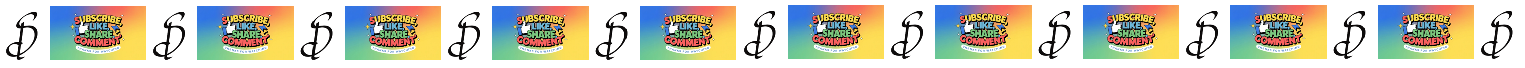

# Importing Library

In [2]:
import numpy as np
import pandas as pd

In [3]:
path = 'https://raw.githubusercontent.com/gitanuurage/YouTube/refs/heads/main/delaney_solubility_with_descriptors.csv'
df = pd.read_csv(path)
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#**Data Preparation**

Data Saperation

In [5]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [6]:
X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


# Splitting Data into Training and Test Sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Building**

**Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

# Evaluate Performance

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [14]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.0139894491573003
LR R2 (Train):  0.7695127746587307
LR MSE (Test):  0.9990844407075306
LR R2 (Test):  0.7705650058569232


In [15]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [16]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


#**Random Forest**

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [18]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [21]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [22]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.050251,0.76127,1.046995,0.759562


#**Comparison of two Models**

In [24]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
0,Random forest,1.050251,0.76127,1.046995,0.759562


#**Data visualization of prediction results**

Text(0.5, 0, 'Experimental LogS')

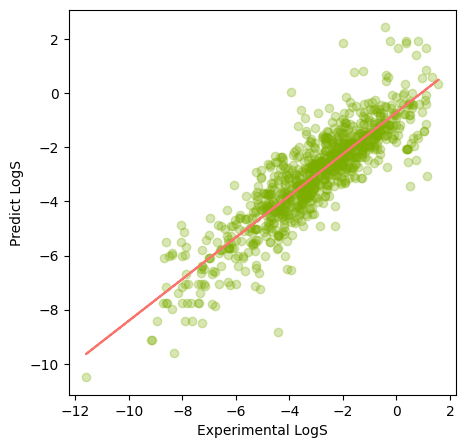

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

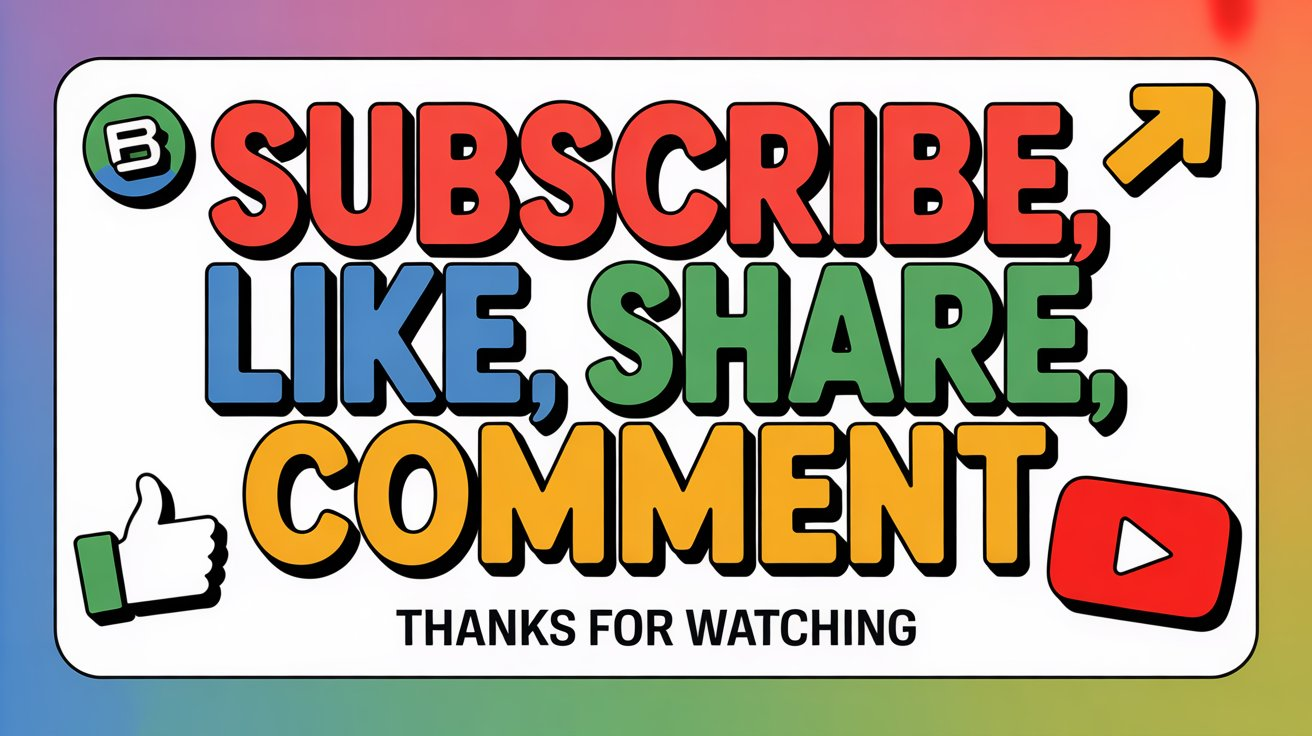